## Importing Libraries

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import pickle
from mlxtend.data import loadlocal_mnist
import random

## Setting Numpy Seed

## Processing MNIST Dataset

In [192]:
def process_mnist_data() -> (np.ndarray, np.ndarray, np.ndarray, np.ndarray):
    mnist_path = './MNIST/'
    train_images, train_labels = loadlocal_mnist(
        images_path = mnist_path + './train-images.idx3-ubyte',
        labels_path = mnist_path + './train-labels.idx1-ubyte'
    )
    test_images, test_labels = loadlocal_mnist(
        images_path = mnist_path + './t10k-images.idx3-ubyte',
        labels_path = mnist_path + './t10k-labels.idx1-ubyte'
    )
    return train_images, train_labels, test_images, test_labels

## Processing CIFAR-10 Dataset

In [193]:
def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

In [194]:
def process_cifar_dataset() -> (np.ndarray, np.ndarray, np.ndarray, np.ndarray):
    cifar_path = './cifar-10-python/cifar-10-batches-py'
    data_batch = unpickle(cifar_path + '/data_batch_1')
    train_images, train_labels = data_batch[b'data'], np.array(data_batch[b'labels'])
    for i in range(2,6):
        data_batch = unpickle(cifar_path + '/data_batch_' + str(i))
        train_images = np.concatenate((train_images, data_batch[b'data']), axis=0)
        train_labels = np.concatenate((train_labels, np.array(data_batch[b'labels'])), axis=0)
    test_batch = unpickle(cifar_path + '/test_batch')
    test_images, test_labels = test_batch[b'data'], np.array(test_batch[b'labels'])
    return train_images, train_labels, test_images, test_labels

## Processing Toy Dataset

In [195]:
def process_toy_dataset():
    toy_dataset_path = './Toy Dataset/'
    a = np.loadtxt(toy_dataset_path + 'trainNN.txt')
    b = np.loadtxt(toy_dataset_path + 'testNN.txt')
    train_x, train_y, test_x, test_y = a[:, 0:4], a[:, -1], b[:, 0:4], b[:, -1]
    return train_x, train_y, test_x, test_y

In [196]:
x_train_toy, y_train_toy, x_test_toy, y_test_toy = process_toy_dataset()
toy_batch_1 = x_train_toy[0:50].reshape(50, 1, 2, 2)
toy_batch_1[0, 0, :, :]

array([[ 9.21323266, 11.82445528],
       [16.69098092, 19.56967227]])

In [197]:
label_binarizer = LabelBinarizer()
label_binarizer.fit(range(1,5))
toy_labels_1 = label_binarizer.transform(y_train_toy[0:50].T)
toy_labels_1

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1,

## Parsing Input Model

In [198]:
def parse_input_model():
    path = './input_model.txt'
    model = []
    with open(path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            tokens = line.split()
            if tokens[0] == 'Conv':
                model.append(ConvolutionLayerBatch(int(tokens[1]), int(tokens[2]), int(tokens[3]), int(tokens[4])))
            if tokens[0] == 'ReLU':
                model.append(ActivationLayer())
            if tokens[0] == 'Pool':
                model.append(MaxPoolingLayerBatch(int(tokens[1]), int(tokens[2])))
            if tokens[0] == 'FC':
                model.append(FlatteningLayerBatch())
                model.append(FullyConnectedLayerBatch(int(tokens[1])))
            if tokens[0] == 'Softmax':
                model.append(SoftmaxLayerBatch())
        return model

## ReLU and ReLU Derivative Functions

In [199]:
def relu(matrix:np.ndarray) -> np.ndarray:
    return matrix * (matrix > 0)

In [200]:
def relu_derivative(matrix: np.ndarray) -> np.ndarray:
    return (matrix > 0) * 1.0

## Convolution Layer

In [201]:
class ConvolutionLayer:
    def __init__(self, output_channel_count: int, filter_dimension: int, stride: int, padding: int):
        self.output_channel_count = output_channel_count
        self.filter_dimension = filter_dimension
        self.stride = stride
        self.padding = padding

    def forward(self, input_image: np.ndarray) -> np.ndarray:
        input_dimentions = input_image.shape[0]
        output_dimentions = (input_dimentions - self.filter_dimension + 2 * self.padding) // self.stride + 1
        input_shape = input_image.shape

        filters = np.random.rand(
            self.output_channel_count,
            self.filter_dimension,
            self.filter_dimension,
            input_shape[2]
        )

        bias = np.random.rand(self.output_channel_count)

        padded_image = np.pad(input_image, [(self.padding,self.padding), (self.padding,self.padding), (0,0)], mode='constant') * 1.0
        padded_image /= 255.0
        padded_dimensions = padded_image.shape

        output = np.zeros((output_dimentions, output_dimentions, self.output_channel_count))

        image_y = out_y = 0
        while image_y + self.filter_dimension <= padded_dimensions[1]:
            image_x = out_x = 0
            while image_x + self.filter_dimension <= padded_dimensions[0]:
                image_slice = padded_image[image_x:image_x+self.filter_dimension, image_y:image_y+self.filter_dimension, :]
                output[out_x, out_y, :] = np.sum(image_slice * filters) + bias
                image_x += self.stride
                out_x += 1
            image_y += self.stride
            out_y += 1

        return output

    def backward(self):
        pass

In [202]:
class ConvolutionLayerBatch:
    def __init__(self, output_channel_count: int, filter_dimension: int, stride: int, padding: int):
        self.output_channel_count = output_channel_count
        self.filter_dimension = filter_dimension
        self.stride = stride
        self.padding = padding
        self.bias = None
        self.filters = None
        self.input_batch = None

    def forward(self, input_batch: np.ndarray) -> np.ndarray:
        self.input_batch = input_batch

        input_dimentions = input_batch.shape
        output_dimentions = (input_dimentions[2] - self.filter_dimension + 2 * self.padding) // self.stride + 1
        input_shape = input_batch.shape

        if self.filters is None:
            self.filters = np.random.randn(
                self.output_channel_count,
                input_shape[1],
                self.filter_dimension,
                self.filter_dimension
            ) * np.sqrt(2/input_shape[1] * self.filter_dimension ** 2)

        if self.bias is None:
            self.bias = np.zeros(self.output_channel_count)

        padded_image = np.pad(input_batch, [(0, 0), (0, 0), (self.padding,self.padding), (self.padding,self.padding)], mode='constant') * 1.0
        padded_image /= 255.0
        padded_dimensions = padded_image.shape

        output = np.zeros((input_dimentions[0], self.output_channel_count, output_dimentions, output_dimentions))

        for i in range(input_dimentions[0]):
            image_y = out_y = 0
            while image_y + self.filter_dimension <= padded_dimensions[3]:
                image_x = out_x = 0
                while image_x + self.filter_dimension <= padded_dimensions[2]:
                    image_slice = padded_image[i, :, image_x:image_x+self.filter_dimension, image_y:image_y+self.filter_dimension]
                    output[i, :, out_x, out_y] = np.sum(image_slice * self.filters) + self.bias
                    image_x += self.stride
                    out_x += 1
                image_y += self.stride
                out_y += 1

        return output

    def backward(self, dz: np.ndarray, learning_rate:float = 10e-6) -> np.ndarray:
        batch_size = dz.shape[0]
        db = np.sum(dz, axis=(0, 2, 3))
        self.bias = self.bias - learning_rate * db / batch_size
        padded_image = np.pad(self.input_batch, [(0, 0), (0, 0), (self.padding,self.padding), (self.padding,self.padding)], mode='constant') * 1.0
        padded_dimensions = padded_image.shape

        dw = np.zeros(self.filters.shape)
        dz_prime_dim = (dz.shape[2] - 1) * self.stride + 1
        dz_prime = np.zeros((dz.shape[0], dz.shape[1], dz_prime_dim, dz_prime_dim))
        dz_prime[:, :, ::self.stride, ::self.stride] = dz

        # calculate dw
        for i in range(padded_dimensions[0]):
            image_y = out_y = 0
            while image_y + dz_prime_dim <= padded_dimensions[3]:
                image_x = out_x = 0
                while image_x + dz_prime_dim <= padded_dimensions[2]:
                    image_slice = padded_image[i, :, image_x:image_x+dz_prime_dim, image_y:image_y+dz_prime_dim]
                    dz_slice = dz_prime[i, :, :, :]
                    dz_slice_shape = dz_slice.shape
                    dz_slice = np.broadcast_to(dz_slice, (image_slice.shape[0], dz_slice_shape[0], dz_slice_shape[1], dz_slice_shape[2])).transpose((1, 0, 2, 3))
                    dw[:, :, out_x, out_y] += np.sum(image_slice * dz_slice, axis=(2, 3))
                    image_x += 1
                    out_x += 1
                image_y += 1
                out_y += 1

        rotated_filter = np.rot90(self.filters, 2, axes=(2, 3))
        dx = np.zeros(self.input_batch.shape)
        padding = self.filter_dimension - 1 - self.padding
        if padding < 0:
            dz_prime_padded = dz_prime[:, :, -padding:padding, -padding:padding]
        else:
            dz_prime_padded = np.pad(dz_prime, [(0, 0), (0, 0), (padding, padding), (padding, padding)], mode='constant')

        dz_padded_dimensions = dz_prime_padded.shape

        # calculate dx
        for i in range(dz_padded_dimensions[0]):
            dz_y = out_y = 0
            while dz_y + self.filter_dimension <= dz_padded_dimensions[3]:
                dz_x = out_x = 0
                while dz_x + self.filter_dimension <= dz_padded_dimensions[2]:
                    dzp_slice = dz_prime_padded[i, :, dz_x:dz_x+self.filter_dimension, dz_y:dz_y+self.filter_dimension]
                    dzp_slice = dzp_slice.reshape(dz_padded_dimensions[1], 1, self.filter_dimension, self.filter_dimension)
                    dx[i, :, out_x, out_y] = np.sum(dzp_slice * rotated_filter, axis=(0, 2, 3))
                    dz_x += 1
                    out_x += 1
                dz_y += 1
                out_y += 1

        self.filters -= learning_rate * dw / batch_size
        return dx

In [203]:
test_conv = ConvolutionLayerBatch(4, 2, 2, 2)
test_conv_out = test_conv.forward(toy_batch_1)
test_conv_out.shape

(50, 4, 3, 3)

In [204]:
test_conv_out[0, 0, :, :]

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        , -0.67496596,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

## Activation Layer

In [205]:
class ActivationLayer:
    def __init__(self):
        pass

    @staticmethod
    def forward(input_matrix: np.ndarray) -> np.ndarray:
        return relu(input_matrix)

    @staticmethod
    def backward(input_matrix: np.ndarray) -> np.ndarray:
        return input_matrix * relu_derivative(input_matrix)

In [206]:
test_activation = ActivationLayer()
test_activation_out = test_activation.forward(test_conv_out)
test_activation_out.shape

(50, 4, 3, 3)

In [207]:
test_activation_out[0, 0, :, :]

array([[ 0.,  0.,  0.],
       [ 0., -0.,  0.],
       [ 0.,  0.,  0.]])

## Max Pooling Layer

In [208]:
class MaxPoolingLayer:
    def __init__(self, filter_dimension: int, stride: int):
        self.filter_dimension = filter_dimension
        self.stride = stride

    def forward(self, image: np.ndarray) -> np.ndarray:
        input_dimensions = image.shape
        output_dimension = (input_dimensions[0] - self.filter_dimension) // self.stride + 1

        output = np.zeros((output_dimension, output_dimension, input_dimensions[2]))

        image_y = out_y = 0
        while image_y + self.filter_dimension <= input_dimensions[1]:
            image_x = out_x = 0
            while image_x + self.filter_dimension <= input_dimensions[0]:
                image_slice = image[image_x: image_x+self.filter_dimension, image_y: image_y+self.filter_dimension, :]
                output[out_x, out_y, :] = np.max(image_slice, axis=(0, 1))
                image_x += self.stride
                out_x += 1
            image_y += self.stride
            out_y += 1

        return output

    def backward(self):
        pass

In [209]:
class MaxPoolingLayerBatch:
    def __init__(self, filter_dimension: int, stride: int):
        self.filter_dimension = filter_dimension
        self.stride = stride
        self.mask = None
        self.input_dimensions = None

    def forward(self, image: np.ndarray) -> np.ndarray:
        input_dimensions = image.shape
        self.input_dimensions = input_dimensions
        output_dimension = (input_dimensions[2] - self.filter_dimension) // self.stride + 1

        output = np.zeros((input_dimensions[0], input_dimensions[1], output_dimension, output_dimension))
        self.mask = np.zeros(input_dimensions)

        for i in range(input_dimensions[0]):
            image_y = out_y = 0
            while image_y + self.filter_dimension <= input_dimensions[3]:
                image_x = out_x = 0
                while image_x + self.filter_dimension <= input_dimensions[2]:
                    image_slice = image[i, :, image_x: image_x+self.filter_dimension, image_y: image_y+self.filter_dimension]
                    max_val = np.max(image_slice, axis=(1, 2))
                    output[i, :, out_x, out_y] = max_val
                    self.mask[i, :, image_x: image_x+self.filter_dimension, image_y: image_y+self.filter_dimension] = image_slice == max_val.reshape(input_dimensions[1], 1, 1)
                    image_x += self.stride
                    out_x += 1
                image_y += self.stride
                out_y += 1

        return output

    def backward(self, dh:np.ndarray) -> np.ndarray:
        output = np.zeros(self.input_dimensions)

        for i in range(self.input_dimensions[0]):
            out_y = dh_y = 0
            while out_y + self.filter_dimension <= self.input_dimensions[3]:
                out_x = dh_x = 0
                while out_x + self.filter_dimension <= self.input_dimensions[2]:
                    mask_patch = self.mask[i, :, out_x: out_x+self.filter_dimension, out_y: out_y+self.filter_dimension]
                    output[i, :, out_x: out_x+self.filter_dimension, out_y: out_y+self.filter_dimension] += mask_patch * dh[i, :, dh_x, dh_y].reshape(self.input_dimensions[1], 1, 1)
                    out_x += self.stride
                    dh_x += 1
                out_y += self.stride
                dh_y += 1

        return output

In [210]:
test_maxpool = MaxPoolingLayerBatch(2, 1)
test_maxpool_out = test_maxpool.forward(test_activation_out)
test_maxpool_out.shape

(50, 4, 2, 2)

In [211]:
test_maxpool_out[0, 0, :, :]

array([[ 0.,  0.],
       [ 0., -0.]])

## Flattening Layer

In [212]:
class FlatteningLayer:
    def __init__(self):
        pass

    @staticmethod
    def forward(image: np.ndarray) -> np.ndarray:
        return image.flatten().reshape(-1, 1)

    def backward(self):
        pass

In [213]:
class FlatteningLayerBatch:
    def __init__(self):
        self.input_shape = None

    def forward(self, input_batch: np.ndarray) -> np.ndarray:
        input_shape = input_batch.shape
        self.input_shape = input_shape
        return input_batch.reshape((input_shape[0], -1))

    def backward(self, dh_flattened: np.ndarray) -> np.ndarray:
        return dh_flattened.reshape(self.input_shape)

In [214]:
test_flattening = FlatteningLayerBatch()
test_flattening_out = test_flattening.forward(test_maxpool_out)
test_flattening_out.shape

(50, 16)

In [215]:
test_flattening_out

array([[ 0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
         0.,  0., -0.],
       [ 0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
         0.,  0., -0.],
       [ 0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
         0.,  0., -0.],
       [ 0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
         0.,  0., -0.],
       [ 0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
         0.,  0., -0.],
       [ 0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
         0.,  0., -0.],
       [ 0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
         0.,  0., -0.],
       [ 0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
         0.,  0., -0.],
       [ 0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
         0.,  0., -0.],
       [ 0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
         0.,  0., -0.],
       [ 0.,  0.,  0., -0.,  0

## Fully Connected Layer

In [216]:
class FullyConnectedLayer:
    def __init__(self, output_dimension: int):
        self.output_dimension = output_dimension

    def forward(self, flattened_input: np.ndarray) -> np.ndarray:
        weights = np.random.rand(flattened_input.shape[0], self.output_dimension)
        bias = np.random.rand(self.output_dimension, 1)

        return weights.T @ flattened_input + bias

    def backward(self):
        pass

In [217]:
class FullyConnectedLayerBatch:
    def __init__(self, output_dimension: int):
        self.output_dimension = output_dimension
        self.input_matrix = None
        self.weights = None
        self.bias = None

    def forward(self, flattened_input: np.ndarray) -> np.ndarray:
        if self.weights is None:
            # self.weights = np.random.randn(flattened_input.shape[1], self.output_dimension) * np.sqrt(2/flattened_input.shape[1])
            self.weights = np.random.randn(flattened_input.shape[1], self.output_dimension) * 0
        if self.bias is None:
            self.bias = np.zeros((1, self.output_dimension))
        self.input_matrix = flattened_input

        return flattened_input @ self.weights + self.bias

    def backward(self, d_theta: np.ndarray, learning_rate: float = 0.01) -> np.ndarray:
        n = d_theta.shape[0]
        dw = self.input_matrix.T @ d_theta
        db = np.sum(d_theta, axis=0, keepdims=True)
        dh = d_theta @ self.weights.T
        self.weights = self.weights - learning_rate * dw / n
        self.bias = self.bias - learning_rate * db / n

        return dh

In [218]:
test_fc = FullyConnectedLayerBatch(4)
test_fc_out = test_fc.forward(test_flattening_out)
test_fc_out.shape

(50, 4)

In [219]:
test_fc_out

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


## Softmax Layer

In [220]:
class SoftmaxLayer:
    def __init__(self):
        pass

    @staticmethod
    def forward(input_matrix: np.ndarray) -> np.ndarray:
        exp = np.exp(input_matrix)
        exp /= np.sum(exp)
        return exp

    def backward(self):
        pass

In [221]:
class SoftmaxLayerBatch:
    def __init__(self):
        self.y_hat = None

    def forward(self, input_matrix: np.ndarray) -> np.ndarray:
        input_matrix -= np.max(input_matrix)
        exp = np.exp(input_matrix)
        exp_sum = np.sum(exp, axis=1).reshape(-1, 1)
        exp /= exp_sum
        self.y_hat = exp
        return exp

    def backward(self, y: np.ndarray) -> np.ndarray:
        return self.y_hat - y

In [222]:
test_softmax = SoftmaxLayerBatch()
test_softmax_out = test_softmax.forward(test_fc_out)
test_softmax_out.shape

(50, 4)

In [223]:
test_softmax_out

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.

## Backprop Test

#### Loss Function

In [224]:
def loss_function(y_true, y_pred):
    labels = y_true * np.log(y_pred) * -1.0
    return np.sum(labels) / y_true.shape[0]

In [225]:
loss_function_test = loss_function(toy_labels_1, test_softmax_out)
loss_function_test

1.3862943611198904

#### Softmax Layer

In [226]:
test_softmax_back = test_softmax.backward(toy_labels_1)
print(test_softmax_back.shape)
test_softmax_back

(50, 4)


array([[-0.75,  0.25,  0.25,  0.25],
       [ 0.25, -0.75,  0.25,  0.25],
       [ 0.25,  0.25,  0.25, -0.75],
       [ 0.25,  0.25, -0.75,  0.25],
       [ 0.25,  0.25,  0.25, -0.75],
       [ 0.25, -0.75,  0.25,  0.25],
       [-0.75,  0.25,  0.25,  0.25],
       [ 0.25,  0.25, -0.75,  0.25],
       [-0.75,  0.25,  0.25,  0.25],
       [ 0.25,  0.25, -0.75,  0.25],
       [ 0.25,  0.25, -0.75,  0.25],
       [ 0.25,  0.25, -0.75,  0.25],
       [ 0.25,  0.25, -0.75,  0.25],
       [ 0.25, -0.75,  0.25,  0.25],
       [-0.75,  0.25,  0.25,  0.25],
       [ 0.25, -0.75,  0.25,  0.25],
       [-0.75,  0.25,  0.25,  0.25],
       [ 0.25,  0.25, -0.75,  0.25],
       [ 0.25,  0.25,  0.25, -0.75],
       [-0.75,  0.25,  0.25,  0.25],
       [-0.75,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25, -0.75],
       [-0.75,  0.25,  0.25,  0.25],
       [-0.75,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25, -0.75],
       [-0.75,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25, -0.75],
 

#### Fully Connected Layer

In [227]:
test_fc_back = test_fc.backward(test_softmax_back, learning_rate=0.01)
print(test_fc_back.shape)
test_fc_back

(50, 16)


array([[ 0.24620846, -0.15331187, -0.23403519, -0.57539192,  0.2116063 ,
         0.06779583, -0.19977829,  0.10618642,  0.42891257, -0.52649464,
         0.17567305, -0.296693  , -0.27723751, -0.12117404, -0.39549734,
         0.14022672],
       [-0.37715949,  0.16288444,  0.54643948, -0.50233602,  0.2977898 ,
         0.24093945,  0.3663977 , -0.49106435, -0.29163012,  0.62712154,
        -0.0327237 ,  0.31612033,  0.54363107, -0.85932417, -0.1129209 ,
        -0.13740434],
       [ 0.18334086,  0.21779816, -0.61442125,  0.48345543, -0.12794938,
        -0.65678613,  0.24948269,  0.09834281,  0.2422355 , -0.31168892,
        -0.15259337,  0.05160291, -0.48861153,  0.96308939,  0.42864002,
         0.04402557],
       [-0.05238983, -0.22737073,  0.30201697,  0.59427252, -0.38144672,
         0.34805085, -0.41610209,  0.28653513, -0.37951795,  0.21106201,
         0.00964403, -0.07103024,  0.22221797,  0.01740882,  0.07977821,
        -0.04684795],
       [ 0.18334086,  0.21779816, -0

#### Flattening Layer

In [228]:
test_flattening_back = test_flattening.backward(test_fc_back)
test_flattening_back[0, 0, :, :]

array([[ 0.24620846, -0.15331187],
       [-0.23403519, -0.57539192]])

#### MaxPooling Layer

In [229]:
test_maxpool_back = test_maxpool.backward(test_flattening_back)
test_flattening_back.shape

(50, 4, 2, 2)

In [230]:
test_maxpool_back[0, 0, :, :]

array([[ 0.24620846,  0.09289659, -0.15331187],
       [ 0.01217327, -0.71653052, -0.72870379],
       [-0.23403519, -0.80942712, -0.57539192]])

#### Activation Layer

In [231]:
test_activation_back = test_activation.backward(test_maxpool_back)
test_activation_back.shape

(50, 4, 3, 3)

In [232]:
test_activation_back[0, 0, :, :]

array([[ 0.24620846,  0.09289659, -0.        ],
       [ 0.01217327, -0.        , -0.        ],
       [-0.        , -0.        , -0.        ]])

#### Convolution Layer

In [233]:
test_conv_back = test_conv.backward(test_activation_back, learning_rate=0.01)
test_conv_back.shape

(50, 1, 2, 2)

In [234]:
test_conv_back[0, 0, :, :]

array([[ 0.12380341, -0.9268641 ],
       [-0.57593114, -0.57167612]])

## Main Test

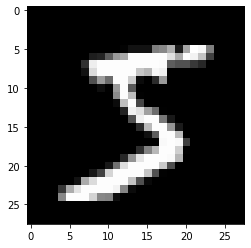

In [235]:
x_train, y_train, x_test, y_test = process_mnist_data()
img = x_train[0].reshape(28, 28, 1)
plt.imshow(img, cmap='gray')

In [236]:
model = parse_input_model()
mnist_batch_1 = x_train[0:32].reshape(32, 1, 28, 28)
mnist_labels_1 = y_train[0:32]
mnist_batch_1.shape

(32, 1, 28, 28)

In [237]:
# train
random_index = random.sample(range(0, 10000), 4992)
mnist_subsample_x = x_train[random_index]
mnist_subsample_y = y_train[random_index]
# validation
mnist_validation_x = x_test[:2000]
mnist_validation_y = y_test[:2000]
# test
mnist_test_x = x_test[5001:7001]
mnist_test_y = y_test[5001:7001]

In [238]:
label_binarizer = LabelBinarizer()
label_binarizer.fit(range(0,10))

LabelBinarizer()

In [239]:
validation_batch = mnist_validation_x.reshape(2000, 1, 28, 28)
validation_labels = label_binarizer.transform(mnist_validation_y)

In [240]:
validation_labels[0:100]

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0,

In [241]:
test_batch = mnist_test_x.reshape(2000, 1, 28, 28)
test_labels = label_binarizer.transform(mnist_test_y)

In [242]:
test_labels[0:100]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0,

In [243]:
def measure_accuracy(y_true, y_pred):
    accurate = np.sum(np.all(y_true == y_pred, axis=1))
    total = y_true.shape[0]
    return accurate / total

In [244]:
def predict_labels(a):
    return (a == a.max(axis=1)[:,None]).astype(int)

In [246]:
# %%timeit
# inp = mnist_batch_1
# for layer in model:
#     inp = layer.forward(inp)
#
# labels_true = label_binarizer.transform(mnist_labels_1)
# l = loss_function(labels_true, inp)
#
# out = labels_true
# for layer in reversed(model):
#     out = layer.backward(out)

In [247]:
# for i in range(10):
#     losses = []
#     index = [i for i in range(1,157)]
#     for j in range(0, 4992, 32):
#         batch_x = mnist_subsample_x[j:j+32].reshape(32, 1, 28, 28)
#         batch_y = mnist_subsample_y[j:j+32]
#         model_out = batch_x
#         # train
#         for layer in model:
#             # print(layer)
#             model_out = layer.forward(model_out)
#             # print(model_out.shape)
#
#         true_labels = label_binarizer.transform(batch_y)
#         l = loss_function(true_labels, model_out)
#         losses.append(l)
#         # print("Epoc {} batch {} loss = {}".format(i, j//32, l))
#
#
#         model_back = true_labels
#         for layer in reversed(model):
#             # print(layer)
#             model_back = layer.backward(model_back)
#             # print(model_back.shape)
#
#     plt.plot(index, losses)
#     plt.show()
#
#     #validation
#     validation_out = validation_batch
#     for layer in model:
#         validation_out = layer.forward(validation_out)
#     validation_loss = loss_function(validation_labels, validation_out)
#     print('Validation loss after epoc {} is {}'.format(i, validation_loss))
#     validation_predictions = predict_labels(validation_out)
#     accuracy = measure_accuracy(validation_labels, validation_predictions)
#     print('Validation accuracy after epoc {} is {}'.format(i, accuracy))

In [248]:
label_binarizer_toy = LabelBinarizer()
label_binarizer_toy.fit(range(1,5))

LabelBinarizer()

In [249]:
toy_model = [FullyConnectedLayerBatch(4), SoftmaxLayerBatch()]
x_train, y_train, x_test, y_test = process_toy_dataset()
x_validation, y_validation = x_test[:250], y_test[:250]
x_test, y_test = x_test[250:], y_test[250:]

In [250]:
y_validation = label_binarizer_toy.transform(y_validation)
y_test = label_binarizer_toy.transform(y_test)

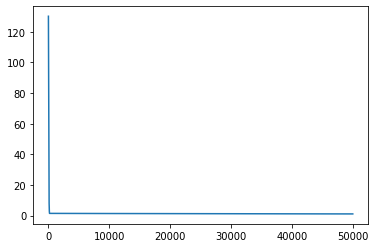

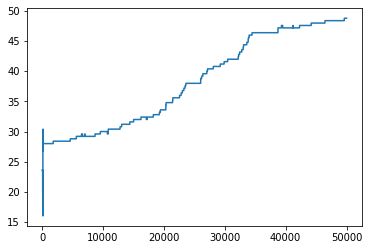

In [251]:
validation_losses = []
validation_accuracy = []
validation_index = [i for i in range(1,50001)]
for i in range(50000):
    losses = []
    index = [i for i in range(1,21)]
    for j in range(0, 500, 25):
        batch_x = x_train[j:j+25]
        batch_y = y_train[j:j+25]
        model_out = batch_x
        # train
        for layer in toy_model:
            model_out = layer.forward(model_out)

        true_labels = label_binarizer_toy.transform(batch_y)
        l = loss_function(true_labels, model_out)
        losses.append(l)
        # print("Epoc {} batch {} loss = {}".format(i, j//32, l))

        model_back_toy = true_labels
        for layer in reversed(toy_model):
            model_back_toy = layer.backward(model_back_toy)

    # plt.plot(index, losses)
    # plt.show()

    #validation
    validation_out = x_validation
    for layer in toy_model:
        validation_out = layer.forward(validation_out)
    validation_loss = loss_function(y_validation, validation_out)
    # print('Validation loss after epoc {} is {}'.format(i, validation_loss))
    validation_losses.append(validation_loss)
    validation_predictions = predict_labels(validation_out)
    # accuracy = accuracy(validation_out, y_validation)
    accuracy = measure_accuracy(y_validation, validation_predictions)
    validation_accuracy.append(accuracy*100)
    # print('Validation accuracy after epoc {} is {}'.format(i, accuracy))

# print(validation_losses)
plt.plot(validation_index, validation_losses)
plt.show()
plt.plot(validation_index, validation_accuracy)
plt.show()

In [252]:
test_out = x_test
for layer in toy_model:
    test_out = layer.forward(test_out)
test_prediction = predict_labels(test_out)
# accuracy = accuracy(validation_out, y_validation)
accuracy = measure_accuracy(y_test, test_prediction)
accuracy

0.472